# Customer Segmentation

## How to Run

1. Install requirements: `pip install -r requirements.txt`
2. Run the notebook: `jupyter notebook customer_segmentation_kmeans.ipynb`
3. Ensure the dataset is located at `data/mall_customers.csv`.




The example code provided serves as a starting point for my exploration of customer segmentation. It demonstrates the application of K-Means clustering, a widely used machine learning technique for grouping data. Using this approach, I partition customers into clusters based on features such as transaction amount, account balance, and transaction frequency.



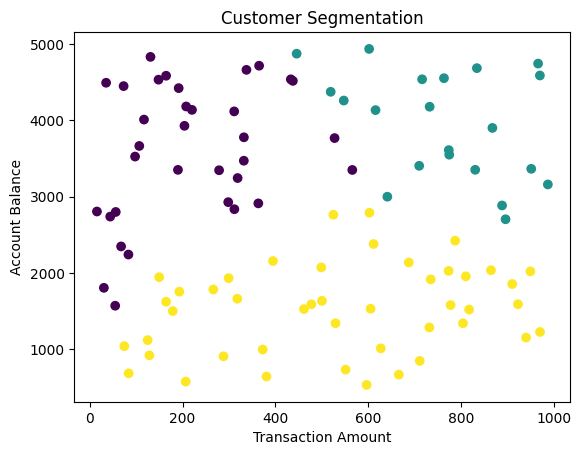

   TransactionAmount  AccountBalance  TransactionFrequency
0         219.104965     3605.076278              5.382353
1         763.371903     3941.642487              4.714286
2         534.833662     1526.159772              4.688889


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 1000, 100),
    'AccountBalance': np.random.uniform(500, 5000, 100),
    'TransactionFrequency': np.random.poisson(5, 100)
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you may want to experiment with this)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['TransactionAmount'], data['AccountBalance'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print(cluster_centers_df)

## Customer Segmentation with Clustering

In this project, I explore customer segmentation using unsupervised machine learning techniques to identify meaningful customer groups based on behavioral and financial attributes. The analysis follows a structured workflow that includes data exploration, clustering with K-Means, comparative analysis using hierarchical clustering, and interpretation of results through visualization and business-focused insights.

I begin by exploring the dataset to understand its structure and key characteristics. This includes examining the distribution of features such as Annual Income and Spending Score, as well as identifying patterns and relationships within the data. This exploratory analysis provides an initial understanding of customer behavior and informs the clustering strategy used later in the project.

I then apply K-Means clustering to standardized customer features in order to segment customers into distinct groups. I experiment with different numbers of clusters and justify the final selection based on analytical reasoning, such as identifying a balance between cluster separation and interpretability. This ensures that the resulting segmentation is both meaningful and practical.

To provide a comparative perspective, I also apply hierarchical clustering using Ward’s linkage method. I analyze the resulting structure to determine an appropriate number of clusters and examine how this approach segments customers differently compared to K-Means. This comparison highlights the strengths and limitations of each clustering technique when applied to the same dataset.

I evaluate the quality of the clustering results by comparing cluster characteristics and assessing how well different customer behaviors are separated. Quantitative evaluation metrics, along with visual inspection, are used to assess clustering performance and interpretability.

To effectively communicate the results, I create visualizations that represent customer clusters and their defining characteristics. These visualizations help reveal behavioral patterns across customer segments and support the translation of technical findings into potential business insights related to customer targeting, retention, and strategic decision-making.

Through this project, I apply and compare multiple clustering techniques to perform customer segmentation. The analysis combines exploratory data analysis, unsupervised modeling, evaluation, and visualization to transform raw data into actionable insights. This workflow demonstrates my ability to approach real-world customer segmentation problems using structured analysis and data-driven reasoning.

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/mall_customers.csv'  # relative path for this repo
data = pd.read_csv(file_path)

# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Apply KMeans clustering
num_clusters = 5  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')

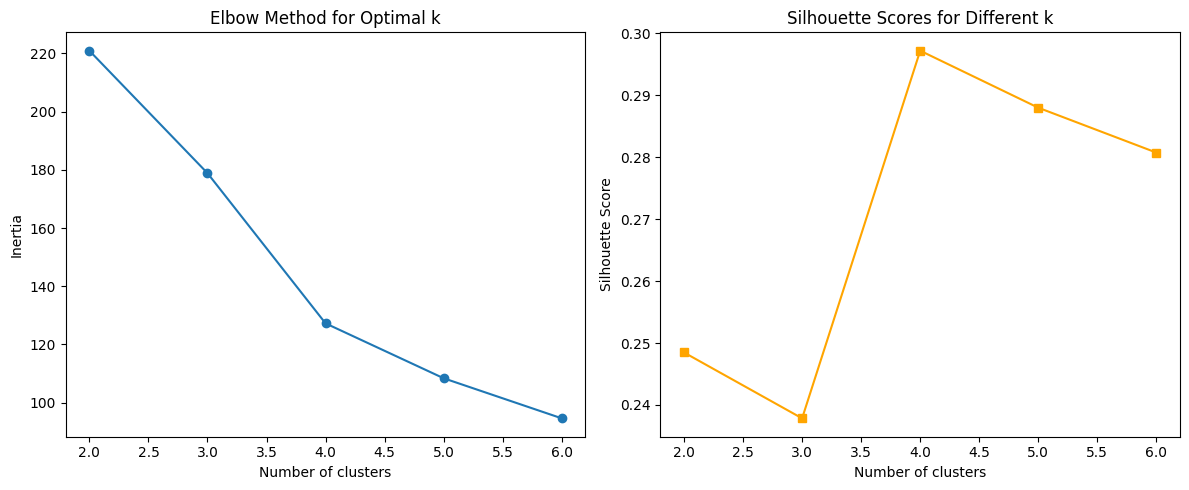

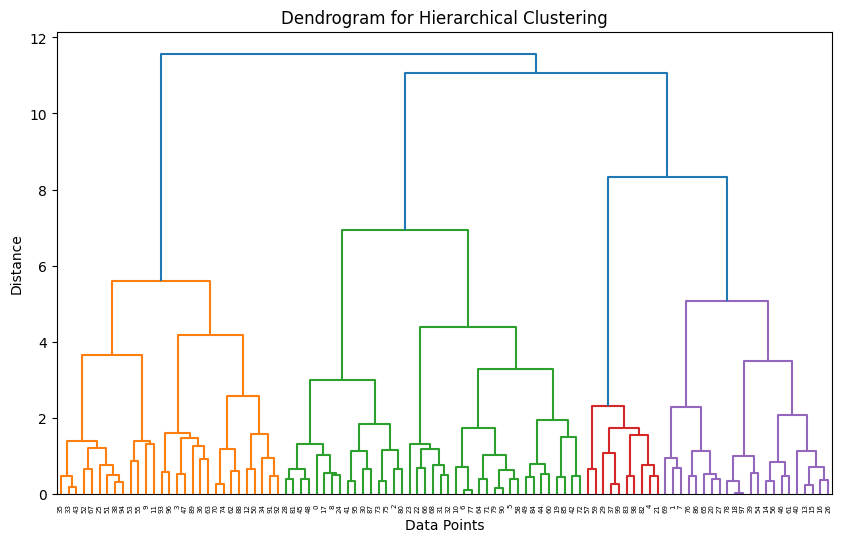

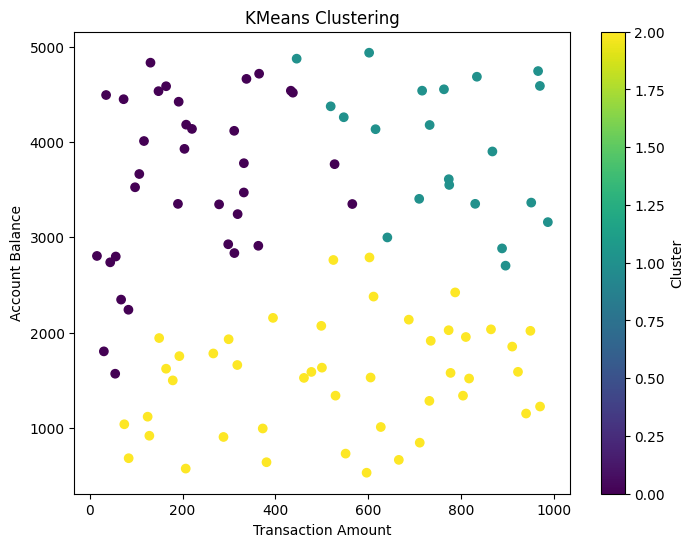

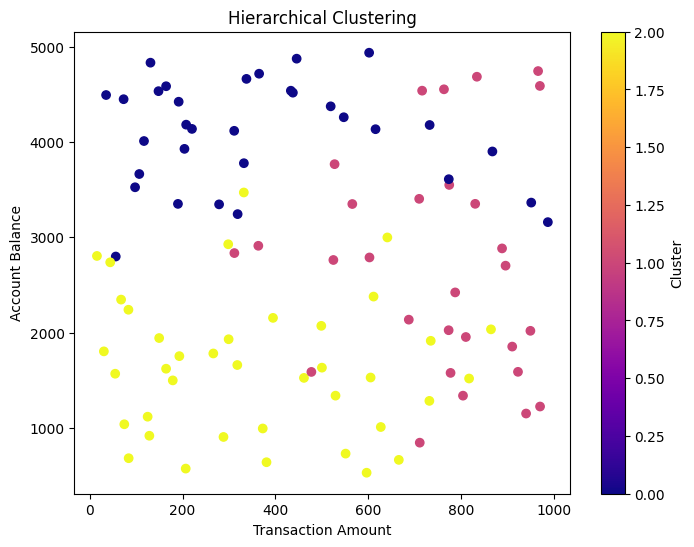


Cluster Centers (KMeans):
    TransactionAmount  AccountBalance  TransactionFrequency
0         219.104965     3605.076278              5.382353
1         763.371903     3941.642487              4.714286
2         534.833662     1526.159772              4.688889

Cluster Metrics Comparison:
          Method  Silhouette Score  Davies-Bouldin Score  \
0        KMeans          0.237844              1.292496   
1  Hierarchical          0.265297              1.308915   

   Calinski-Harabasz Score  
0                32.855499  
1                36.091539  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Generate Sample Data
np.random.seed(42)
data = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 1000, 100),
    'AccountBalance': np.random.uniform(500, 5000, 100),
    'TransactionFrequency': np.random.poisson(5, 100)
})

# 2. Exploratory Data Analysis
eda_summary = data.describe()
correlation_matrix = data.corr()

# 3. Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 4. KMeans Clustering with Different Cluster Numbers
kmeans_scores = []
silhouette_scores = []
for k in range(2, 7):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_model.fit_predict(scaled_data)
    kmeans_scores.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# 5. Apply KMeans with optimal number of clusters
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans_final.fit_predict(scaled_data)

# 6. Apply Hierarchical Clustering
Z = linkage(scaled_data, method='ward')
hierarchical_model = AgglomerativeClustering(n_clusters=optimal_k)
data['Hierarchical_Cluster'] = hierarchical_model.fit_predict(scaled_data)

# 7. Cluster Quality Metrics
kmeans_silhouette = silhouette_score(scaled_data, data['KMeans_Cluster'])
kmeans_db = davies_bouldin_score(scaled_data, data['KMeans_Cluster'])
kmeans_ch = calinski_harabasz_score(scaled_data, data['KMeans_Cluster'])

hierarchical_silhouette = silhouette_score(scaled_data, data['Hierarchical_Cluster'])
hierarchical_db = davies_bouldin_score(scaled_data, data['Hierarchical_Cluster'])
hierarchical_ch = calinski_harabasz_score(scaled_data, data['Hierarchical_Cluster'])

# 8. Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-2])

# 9. Visualizations

# Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 7), kmeans_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 7), silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# KMeans Cluster Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['TransactionAmount'], data['AccountBalance'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.colorbar(label='Cluster')
plt.show()

# Hierarchical Cluster Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['TransactionAmount'], data['AccountBalance'], c=data['Hierarchical_Cluster'], cmap='plasma')
plt.title('Hierarchical Clustering')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.colorbar(label='Cluster')
plt.show()

# 10. Metrics Summary
metrics_df = pd.DataFrame({
    'Method': ['KMeans', 'Hierarchical'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette],
    'Davies-Bouldin Score': [kmeans_db, hierarchical_db],
    'Calinski-Harabasz Score': [kmeans_ch, hierarchical_ch]
})

print("\nCluster Centers (KMeans):\n", cluster_centers_df)
print("\nCluster Metrics Comparison:\n", metrics_df)


### Cluster Evaluation Techniques

When working with unsupervised learning, selecting an appropriate number of clusters is a critical step that directly affects the quality and interpretability of the results. To guide this decision, I use cluster evaluation techniques that help assess how well the data has been partitioned. Two commonly used approaches are the Elbow Method and the Silhouette Score.

The Elbow Method provides a heuristic for identifying a suitable number of clusters by examining how the within-cluster variance changes as the number of clusters increases. By plotting this relationship, I look for a point where adding additional clusters yields diminishing returns in terms of variance reduction. This point, often referred to as the “elbow,” represents a balance between model simplicity and explanatory power.

The Silhouette Score offers a complementary perspective by measuring how similar each data point is to its assigned cluster compared to other clusters. Scores range from -1 to 1, where higher values indicate better-defined and more distinct clusters. Values near zero suggest overlapping clusters, while negative values may indicate misclassification.

By using both methods together, I can make a more informed and balanced decision when selecting the number of clusters. The Elbow Method helps assess overall cluster compactness, while the Silhouette Score evaluates separation between clusters. Combining these perspectives allows me to choose a clustering configuration that is both analytically sound and practically interpretable within the context of the problem.

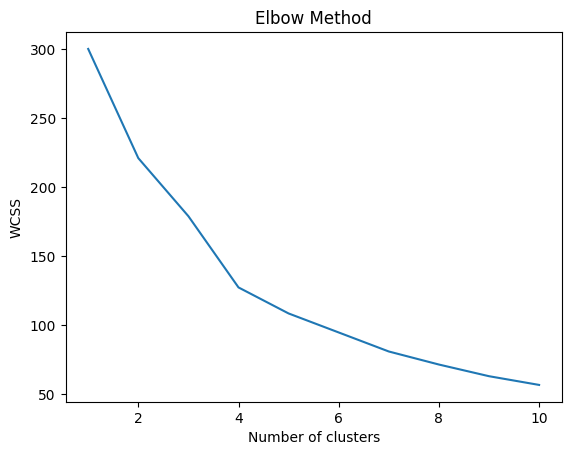

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


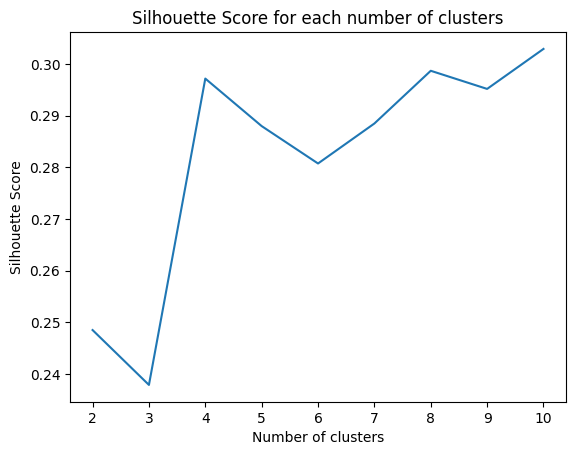

In [7]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for each number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
